# Modeling

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier() #Random Forest
from sklearn.ensemble import GradientBoostingClassifier ## Gradient Boosting Classifier
gbc=GradientBoostingClassifier(n_estimators=10)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=20)

In [4]:
loan_cleaned=pd.read_excel("./loan_cleaned.xlsx")

In [5]:
loan_cleaned.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Years_in_current_job         0
Home_Ownership               0
Annual_Income                0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
dtype: int64

In [128]:
#seperate dataset into predictor-x and response-y:
y=loan_cleaned['Loan_Status']
x=loan_cleaned.drop(['Loan_Status','Loan_ID','Customer_ID'],axis=1)
#I created a copy of x just in case I messed up so I can re-run this cell to recover to orignial x quickly
x_copy=x.copy()

In [129]:
#get rid of '$' and ',' inside the monthly_debt attribute
x_copy['Monthly_Debt']=x_copy.Monthly_Debt.apply(lambda x:x.replace('$','').replace(',','')).astype(float,inplace=True)

# Failed to convert 'Maximum_Open_Credit' from Object into Float
# Keep receiving error: could not convert string to float: '#VALUE!'
# So I just deleted this attribute for god sake :/

In [137]:
x_copy['Maximum_Open_Credit'].convert_objects(convert_numeric=True)

array([16056, 19149, 28335, ..., 55520, 37004, 62371], dtype=object)

In [138]:
x_copy['Maximum_Open_Credit'].replace('', np.nan, inplace=True)

In [139]:
#x_copy['Maximum_Open_Credit'].astype(float)
#x_copy["Maximum_Open_Credit"].astype(float)
#=x_copy['Maximum_Open_Credit'].astype(float,inplace=True)

In [142]:
x_copy.drop('Maximum_Open_Credit',axis=1,inplace=True)

In [143]:
x_copy.dtypes

Current_Loan_Amount            int64
Term                          object
Credit_Score                   int64
Years_in_current_job          object
Home_Ownership                object
Annual_Income                  int64
Purpose                       object
Monthly_Debt                 float64
Years_of_Credit_History      float64
Number_of_Open_Accounts        int64
Number_of_Credit_Problems      int64
Current_Credit_Balance         int64
Bankruptcies                   int64
dtype: object

In [144]:
x_copy=pd.get_dummies(x_copy,drop_first=True)

In [149]:
y=pd.get_dummies(y,drop_first=True)

In [145]:
x_copy.head()

,Current_Loan_Amount,Credit_Score,Annual_Income,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Bankruptcies,Term_Short Term,...,Home_Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_other
0,11520,11520,11520,584.03,12.3,10,0,6760,0,1,...,0,0,0,1,0,0,0,0,0,0
1,3441,3441,3441,1106.04,26.3,17,0,6262,0,1,...,0,0,0,0,0,0,0,0,0,1
2,21029,21029,21029,1321.85,28.8,5,0,20967,0,1,...,0,0,0,1,0,0,0,0,0,0
3,18743,18743,18743,751.92,26.2,9,0,22529,0,1,...,0,0,0,1,0,0,0,0,0,0
4,11731,11731,11731,355.18,11.5,12,0,17391,0,1,...,1,0,0,1,0,0,0,0,0,0


In [150]:
x_train, x_test, y_train, y_test = train_test_split( x_copy, y, test_size=0.2, random_state=42)

# Facing so many untreated categorical features, my first thought was (1) using encoding to ordinal variable but I don't want the number orders influence the algorithm. 2) One hot encoding proved not gonna work on personal pc. Took too much time. (3) I decided to use feature hashing. 

In [147]:
algorithms=[g,b,k,log,d,r,clf]
names=['GaussianNB','BernoulliNB','K Nearest','Logistic','Single Tree',
      'Random Forest','Gradient Boost']
metrics=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
#X-training data_x ; y-training data_y, x_-testing_data_x, y_-testing data_y
def tDMassess(X, y,x_,y_, algorithms, names):
    # fit the data
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(X,y)
    # print metrics
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    for i in range(len(algorithms)):
      
        accuracy.append(accuracy_score(y_, algorithms[i].predict(x_)))
        precision.append(precision_score(y_, algorithms[i].predict(x_)))
        recall.append(recall_score(y_, algorithms[i].predict(x_)))
        f1.append(f1_score(y_, algorithms[i].predict(x_)))
        metrics = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    metrics=pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1', ascending=False)

In [151]:
tDMassess(x_train,y_train,x_test,y_test,algorithms, names)

/Users/wenze/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wenze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/wenze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/wenze/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for ex

,Accuracy,Precision,Recall,F1
Gradient Boost,0.881686,0.924221,0.901323,0.912628
Random Forest,0.844757,0.919300,0.847996,0.882210
Single Tree,0.814172,0.922965,0.795323,0.854403
Logistic,0.685565,0.685565,1.000000,0.813454
BernoulliNB,0.692589,0.707216,0.941282,0.807631
K Nearest,0.686791,0.759252,0.795323,0.776869
GaussianNB,0.448217,0.999419,0.195255,0.326686


# Well..... I chose Gradient Boosting and start Parameter Tunning

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=12,4


In [173]:
#define a function for modeling and cross-validation
def modelfit(algorithm, x, predictors, performCV=True,
            printFeatureImportance=True,cv_folds=5):
    #fit the algorithm into the data
    algorithm.fit(x[predictors],y)
    #predict training set:
    train_predictions=algorithm.predict(x[predictors])
    train_predprob=algorithm.predict_proba(x[predictors])[:,1]
    #perform corss_validation:
    c, r =y.shape
    labels =y.values.reshape(c,)
    
    if performCV:
        cv_score=cross_validation.cross_val_score(algorithm,x[predictors],
                                           labels,cv=cv_folds,scoring='roc_auc')
    #print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y,
                                                    train_predictions))
    print ("AUC Score(train): %f" % metrics.roc_auc_score(y,
                                                        train_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),
                                                                                 np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp=pd.Series(algorithm.feature_importances_,predictors).sort_values(
        ascending=False)
        feat_imp.plot(kind='bar',title='Feature Importance')
        plt.ylabel('Feature Importance Score')

# Baseline Model-GBM

/Users/wenze/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model Report
Accuracy : 0.7036
AUC Score(train): 0.714739
CV Score : Mean - 0.709849 | Std - 0.002387164 | Min - 0.7076661 | Max - 0.7132588


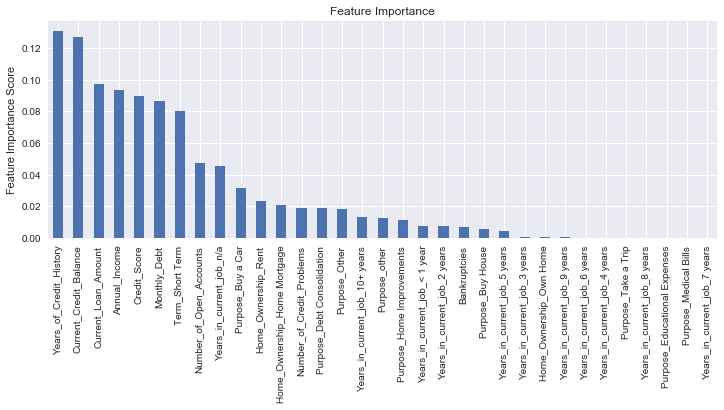

In [174]:
#Choose all of predictors
predictors=[x for x in x_copy.columns]
gbm0=GradientBoostingClassifier(random_state=10)
modelfit(gbm0,x_copy,predictors)

# first set learning rate=0.1 and check what are the optimum number of trees: estimators for GBM.

In [191]:
c, r =y.shape
labels =y.values.reshape(c,)

In [195]:
# Perform our first test(test_1) on the estimator:
param_test1 = {'n_estimators':np.arange(20,101,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                  min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_copy[predictors],labels)               
                     

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [197]:
#check the output
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_

([mean: 0.70865, std: 0.00341, params: {'n_estimators': 20},
  mean: 0.71034, std: 0.00310, params: {'n_estimators': 30},
  mean: 0.71108, std: 0.00309, params: {'n_estimators': 40},
  mean: 0.71181, std: 0.00302, params: {'n_estimators': 50},
  mean: 0.71225, std: 0.00312, params: {'n_estimators': 60},
  mean: 0.71264, std: 0.00317, params: {'n_estimators': 70},
  mean: 0.71281, std: 0.00315, params: {'n_estimators': 80},
  mean: 0.71286, std: 0.00327, params: {'n_estimators': 90},
  mean: 0.71283, std: 0.00327, params: {'n_estimators': 100}],
 {'n_estimators': 90},
 0.712855229449462)

# We got the <font color='blue'>90</font> estimator is the best when we have 0.1 learning rate. At first, I tried the range of the estimators between 20 and 80 but it turns out the best is 80 right on the edge. So I increased the upper boundary of estimator to 100. Then I got 90 is the best. 

# next, I want to try to test max_depth and min_samples_splits.

In [199]:
# Calculate the range for min_sample_splits: bewteen 0.5%~2% of the observation
y.shape[0]*0.5/100,y.shape[0]*2/100

(1284.92, 5139.68)

In [204]:
#Perform our first test(test_1) on the max_depth and min_sample_split:
param_test2 = {'max_depth':np.arange(5,21,2), 'min_samples_split':np.arange(1200,5100,250)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch2.fit(x_copy[predictors],labels) 

KeyboardInterrupt: 

In [ ]:
#check the output
gsearch2.grid_scores_,gsearch1.best_params_,gsearch1.best_score_